<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Análisis de los Estadios de vida del Parásito Leishmania</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

In [1]:
#Cargamos las librerias que vamos a requeririr para hacer el desarrollo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

In [1]:
%pwd

'C:\\Users\\Enrique Mejia\\Documents\\Sebastian_Cintrop'

<font color=green size=5>**Leemos y pegamos todos los espectros de masas, luego los separamos en las intensidades y las relaciones m/z**

In [2]:
import glob
fn = []
all_data3 = pd.DataFrame()
#nombres=['MF']
for f in glob.glob("./Todos2/*.txt"):
    df = pd.read_csv(f, header=None, delimiter=' ' )
    all_data3 = pd.concat([all_data3, df], axis=1)
    fn.append(f) # Guardamos parte del nombre del archivo como una etiqueta de cada muestra
Datamz = all_data3[0] # realciones m/z
Data = all_data3[1] # Intensidades

In [4]:
Data

,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0,109.0,179.0,27.0,275.0,154.0,64.0,19.0,505.0,191.0,273.0,...,1399.0,6701.0,212.0,1250.0,-123.0,12.0,-152.0,54.0,-1.0,259.0
1,76.0,-33.0,-52.0,182.0,81.0,58.0,0.0,362.0,158.0,165.0,...,1348.0,7083.0,245.0,1350.0,-114.0,17.0,-124.0,77.0,10.0,338.0
2,-1.0,-99.0,-41.0,123.0,58.0,100.0,-29.0,431.0,102.0,123.0,...,1401.0,7265.0,267.0,1324.0,-152.0,7.0,-94.0,85.0,13.0,287.0
3,-33.0,-117.0,45.0,23.0,35.0,145.0,-34.0,346.0,87.0,142.0,...,1484.0,7409.0,296.0,1340.0,-222.0,-34.0,-67.0,64.0,-17.0,223.0
4,11.0,-108.0,-46.0,-1.0,29.0,157.0,5.0,269.0,120.0,190.0,...,1525.0,7550.0,256.0,1291.0,-195.0,49.0,-64.0,41.0,-49.0,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color=red size=5>**Inspecccionamos y nos damos cuenta que no todos los espectros han sido tomados en el mismo rango de relaciones m/z.  Debemos eliminar los datos faltantes y dejar todos los espectros con el mismo número de datos**

In [5]:
Data.columns=range(Data.shape[1]) # Aquí le ponemos indices ordenados a las columna de las intensidades
#Datamz.columns=range(Datamz.shape[1])
#Datamz=Data[[0]]
Datamz.tail(10241) # Inspeccionamos los datos de la relación m/z al final para saber hasta donde todos tienen datos, observamos que hasta la fila 32255 hay datos
Data

,0,1,2,3,4,5,6,7,8,9,...,725,726,727,728,729,730,731,732,733,734
0,109.0,179.0,27.0,275.0,154.0,64.0,19.0,505.0,191.0,273.0,...,1399.0,6701.0,212.0,1250.0,-123.0,12.0,-152.0,54.0,-1.0,259.0
1,76.0,-33.0,-52.0,182.0,81.0,58.0,0.0,362.0,158.0,165.0,...,1348.0,7083.0,245.0,1350.0,-114.0,17.0,-124.0,77.0,10.0,338.0
2,-1.0,-99.0,-41.0,123.0,58.0,100.0,-29.0,431.0,102.0,123.0,...,1401.0,7265.0,267.0,1324.0,-152.0,7.0,-94.0,85.0,13.0,287.0
3,-33.0,-117.0,45.0,23.0,35.0,145.0,-34.0,346.0,87.0,142.0,...,1484.0,7409.0,296.0,1340.0,-222.0,-34.0,-67.0,64.0,-17.0,223.0
4,11.0,-108.0,-46.0,-1.0,29.0,157.0,5.0,269.0,120.0,190.0,...,1525.0,7550.0,256.0,1291.0,-195.0,49.0,-64.0,41.0,-49.0,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color=blue size=5>**Creamos una nueva tabla de relaciones m/z que solo contenga las filas hasta donde todos los espectros tengan señal**

In [6]:
Dsna=Datamz[0:32256]
Dsna

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,597.613,597.613,597.613,597.613,597.613,597.613,597.613,597.613,597.613,597.613,...,659.253,659.253,659.253,659.253,597.613,597.613,597.613,597.613,597.613,597.613
1,597.723,597.723,597.723,597.723,597.723,597.723,597.723,597.723,597.723,597.723,...,659.369,659.369,659.369,659.369,597.723,597.723,597.723,597.723,597.723,597.723
2,597.834,597.834,597.834,597.834,597.834,597.834,597.834,597.834,597.834,597.834,...,659.485,659.485,659.485,659.485,597.834,597.834,597.834,597.834,597.834,597.834
3,597.944,597.944,597.944,597.944,597.944,597.944,597.944,597.944,597.944,597.944,...,659.601,659.601,659.601,659.601,597.944,597.944,597.944,597.944,597.944,597.944
4,598.055,598.055,598.055,598.055,598.055,598.055,598.055,598.055,598.055,598.055,...,659.717,659.717,659.717,659.717,598.055,598.055,598.055,598.055,598.055,598.055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32251,9535.585,9535.585,9535.585,9535.585,9535.585,9535.585,9535.585,9535.585,9535.585,9535.585,...,9778.961,9778.961,9778.961,9778.961,9535.585,9535.585,9535.585,9535.585,9535.585,9535.585
32252,9536.029,9536.029,9536.029,9536.029,9536.029,9536.029,9536.029,9536.029,9536.029,9536.029,...,9779.412,9779.412,9779.412,9779.412,9536.029,9536.029,9536.029,9536.029,9536.029,9536.029
32253,9536.474,9536.474,9536.474,9536.474,9536.474,9536.474,9536.474,9536.474,9536.474,9536.474,...,9779.862,9779.862,9779.862,9779.862,9536.474,9536.474,9536.474,9536.474,9536.474,9536.474
32254,9536.918,9536.918,9536.918,9536.918,9536.918,9536.918,9536.918,9536.918,9536.918,9536.918,...,9780.312,9780.312,9780.312,9780.312,9536.918,9536.918,9536.918,9536.918,9536.918,9536.918


<font color=green size=5>**Verificamos que no le hallan quedado casillas sin datos, el resultado es que no quedó ninguno, ningún True**

In [9]:
D=Dsna.isnull().any() # En la tabla D quedan la información booleana (False or True) si hay o no datos perdidos en cada espectro (muestra)
D

0    False
0    False
0    False
0    False
0    False
     ...  
0    False
0    False
0    False
0    False
0    False
Length: 735, dtype: bool

In [10]:
df = D[D[0]==True]
df

Series([], dtype: bool)

<font color=blue size=5>**Ya seguros de que hasta la fila 32255 no hay espectros sin datos de intensidad, volvemos a construir la tabla de intensidades hasta esa fila**

In [11]:
Dataint=Data[0:32256]
Dataint

,0,1,2,3,4,5,6,7,8,9,...,725,726,727,728,729,730,731,732,733,734
0,109.0,179.0,27.0,275.0,154.0,64.0,19.0,505.0,191.0,273.0,...,1399.0,6701.0,212.0,1250.0,-123.0,12.0,-152.0,54.0,-1.0,259.0
1,76.0,-33.0,-52.0,182.0,81.0,58.0,0.0,362.0,158.0,165.0,...,1348.0,7083.0,245.0,1350.0,-114.0,17.0,-124.0,77.0,10.0,338.0
2,-1.0,-99.0,-41.0,123.0,58.0,100.0,-29.0,431.0,102.0,123.0,...,1401.0,7265.0,267.0,1324.0,-152.0,7.0,-94.0,85.0,13.0,287.0
3,-33.0,-117.0,45.0,23.0,35.0,145.0,-34.0,346.0,87.0,142.0,...,1484.0,7409.0,296.0,1340.0,-222.0,-34.0,-67.0,64.0,-17.0,223.0
4,11.0,-108.0,-46.0,-1.0,29.0,157.0,5.0,269.0,120.0,190.0,...,1525.0,7550.0,256.0,1291.0,-195.0,49.0,-64.0,41.0,-49.0,285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32251,184.0,47.0,191.0,-11.0,314.0,263.0,301.0,-4.0,-25.0,30.0,...,11.0,-29.0,23.0,-15.0,57.0,32.0,52.0,40.0,-2.0,62.0
32252,200.0,68.0,174.0,10.0,335.0,275.0,301.0,27.0,2.0,53.0,...,6.0,-4.0,-1.0,42.0,14.0,1.0,58.0,42.0,9.0,62.0
32253,229.0,91.0,133.0,10.0,281.0,238.0,261.0,8.0,35.0,93.0,...,3.0,39.0,-13.0,19.0,7.0,-12.0,52.0,35.0,2.0,27.0
32254,226.0,69.0,142.0,-28.0,245.0,310.0,250.0,24.0,32.0,85.0,...,-10.0,33.0,-15.0,43.0,18.0,-4.0,49.0,42.0,16.0,66.0


<font color=red size=5>**Ahora hacemos una visualización de todos los espectros y para nuestro disgusto encontramos que hay algunos espectros a los que no se les realizó línea base**

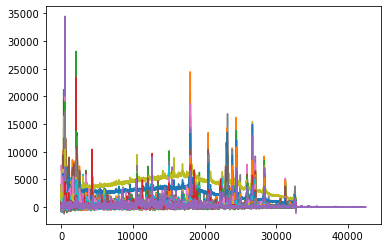

In [12]:
plt.plot(Data);

<font color=blue size=5>**Debemos encontrar esos espectros y eliminarlos de la tabla de datos, hacemos una pequeña rutina**

In [10]:
len(Dataint.columns)

735

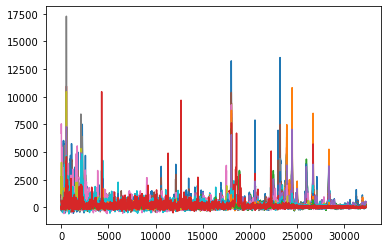

In [13]:
ta=np.arange(0,34)
#fig, axes = plt.subplots(len(ta),1, figsize=(10, 50))
for i in ta:
    #plt.plot(Dataint[458], color='red')
    plt.plot(Dataint[i+700])
    #plt.plot(Dataint[i]);

<font color=blue size=5>**Y LOS ENCONTRAMOS, Estos son los que no tienen línea base, afortunadamente son solo dos, la muestra 458 y 520, tener en cuenta que aquí se empieza a contar desde 1**

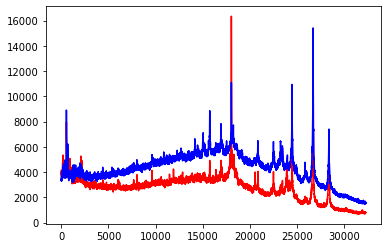

In [14]:
plt.plot(Dataint[520], color='red')
plt.plot(Dataint[458], color='blue')

<font color=green size=5>**Eliminamos los espectros y inspeccionamos con la visualización, observamos que no aparecen esos espectros y quedamos contentos**

In [16]:
ET = pd.read_excel('etiquetas.xlsx')
Y=ET[[0]]
Y1=Y.set_axis(['Clase'], axis=1, inplace=False)
Y1

,Clase
0,LB3D
1,LB3D
2,LB3D
3,LB7D
4,LP3D
...,...
728,LP3D
729,LP3D
730,LP3D
731,LP3D


<font color=navy size=5>**Graficamos todos los espectros de masas, habiendo eliminado los irregulares**

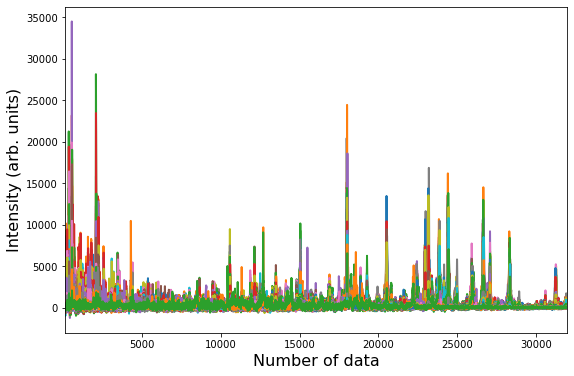

In [17]:
Dsna.columns=range(Dsna.shape[1]) # Aquí le ponemos indices ordenados a las columnsa de las intensidades los espectros defectuosos
Dataintn=Dataint.drop([520, 458], axis=1) # Eliminamos de los datos de intensidad
Dsnan = Dsna.drop([520, 458], axis=1) # Elminamos de los datos de la relación m/z los espectros defectuosos
fn1 = pd.DataFrame(fn).drop([520, 458], axis=0) # Eliminamos de las etiquetas los espectros defectuosos
#plt.plot(Dataintn);
fig, ax = plt.subplots(figsize=(9,6))
#from matplotlib.ticker import MultipleLocator, AutoMinorLocator
#plt.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
plt.rcParams["font.family"] = 'Times New Roman'
ax.plot(Dataintn, lw=2)
ax.set_xlim(100, 32000)
#ax.set_ylim(500, 5000)
ax.set_xlabel('Number of data',  fontsize=16)
ax.set_ylabel('Intensity (arb. units)', fontsize=16)
fig.savefig("todosesp.png", dpi=200)
plt.show()

<font color=navy size=5>**Visualización con Bokeh**

In [15]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure, show
output_notebook()
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

# Draw a chart
p = figure(title='FTIR', plot_width=600, plot_height=400, x_range=(500, 10000),
           x_axis_label='Dalton (m/z)', y_axis_label='Intensity (arb. units)', toolbar_location="above", tools=TOOLS)
p.grid.grid_line_alpha=0.3

p.line(Dsnan[1], Dataintn[1], color='red', legend_label='Mass Spectra', line_width=2, alpha=1)
#p.ygrid.band_fill_color = "olive"
#p.ygrid.band_fill_alpha = 0.1
p.legend.location = "top_right"
p.grid.visible = True
p.title.align = "center"
p.title.text_font_size = "20px"
#p.legend.location = "top_center"

show(p)

Loading BokehJS ...

<font color=navy size=5>**Construimos un modelo no supervisado, PCA, utilizando los datos de intensidad escalado o normalizados, según como se desee.  Aquí se muestra el modelo los datos escalados**

In [18]:
#normalizamos los datos
from sklearn.preprocessing import StandardScaler, Normalizer
scaler=StandardScaler()
#norma=Normalizer()

scaler.fit(Dataintn) # calculo la media para poder hacer la transformacion
x_scaled=scaler.transform(Dataintn)# Ahora si, escalo los datos y los normalizo
#x_norm = preprocessing.normalize(data_signals, norm='l1')# Normaliza los datos
#x_nsd = savgol_filter(x_norm, 17, polyorder=2, deriv=2) # Realiza segunda derivada de los datos

In [20]:
#NM=len(data.columns) # Número de muestras
#suma = np.empty((NM, 1)) #creamos un vector vacío para luego ir llenandolo con el resultado de la suma de intesidades de cada espectro
#k=0 #inicializamos el contador
#for k in np.arange(NM): #lo ponemos a correr hasta 40, que es el numero de espectros(muestras)
#    suma[k]=sum(val[:, k]) #desarrollamos la suma a lo largo de cada columna, cada muestra
#    k +=1 #variamos el contador en 1

#valt=Dataintn.T
#valtn=valt/suma

#valtn = preprocessing.normalize(valt, norm='l1')# Normaliza los datos
# Iniciamos el desarrollo del PCA en este caso con 9 componentes
pca=PCA(n_components=10) # Otra opción es hacer pca hasta obtener un mínimo explicado ej.: pca=PCA(.85)
pca1=pca.fit(x_scaled.T) # obtener los componentes principales
datos_pca=pca.transform(x_scaled.T) # convertimos nuestros datos con las nuevas dimensiones de PCA, scores

#out = pca.fit_transform(valtn) # otra opción

# Esta celda es para observar la varianza explicada con 5 componentes, se podría variar a los que se quisiese
print("shape of datos_pca", datos_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:10]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada
datos_pca1 = pd.DataFrame(datos_pca) # Convierte los datos pca en un DataFrame
datos_pca1=pd.concat([datos_pca1, Y1] ,axis=1) # Se agrega la columna del tipo de muestra

shape of datos_pca (733, 10)
[0.22113911 0.14854364 0.08507605 0.07798916 0.066809   0.04928408
 0.02638089 0.02034331 0.01765331 0.01587153]
suma: 0.729090084977268


In [21]:
scores_df = pd.DataFrame(datos_pca, columns = [f"PC{i+1}" for i in range(datos_pca.shape[1])])
scores_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,92.123951,-30.813594,15.128728,-33.001572,13.860906,-14.314404,12.776419,-7.689505,-6.768571,12.249888
1,102.045997,41.925196,-26.157692,19.086729,-6.510545,-26.492292,12.238064,-9.968086,-11.276386,10.508866
2,109.351064,23.022995,-15.593594,3.103849,-10.621177,-28.136517,5.103042,-12.845385,-8.908369,6.698127
3,83.273458,70.540874,-19.188676,61.790305,-29.122220,19.445511,9.674466,7.771849,21.617165,-27.862816
4,92.763966,-64.820327,15.969860,-17.019132,-22.312920,-7.625925,11.057307,8.723610,-2.152693,-8.628594


<font color=DarkSlateBlue size=5>**Visualizamos el resultado del modelo asignando a cada tipo de muestra un color diferente con el fin de verificar si hay separación entre ellos.  El resultado no es bueno**

In [22]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure, show
output_notebook()
#colormap = {'LB3D': 'red', 'LB7D': 'green', 'LP3D': 'blue', 'LP7D': 'black'}
colormap = {'LB3D': 'red', 'LB7D': 'green', 'LP3D': 'black', 'LP7D': 'yellow'}
colors = [colormap[x] for x in Y1['Clase']]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

# Draw a chart
p = figure(title='PCA', plot_width=600, plot_height=400,
           x_axis_label='PCA 1', y_axis_label='PCA 2', toolbar_location="above", tools=TOOLS)
p.grid.grid_line_alpha=0.3

p.circle(datos_pca1[0], datos_pca1[1],  color=colors, legend_label='PCA', size=10, alpha=0.6)
#p.ygrid.band_fill_color = "olive"
#p.ygrid.band_fill_alpha = 0.1
p.legend.location = "top_right"
p.grid.visible = True
p.title.align = "center"
p.title.text_font_size = "20px"
#p.legend.location = "top_center"

show(p)

Loading BokehJS ...

<font color=PaleVioletRed size=5>**Implementaremos un nuevo modelo, en este caso supervisado, por tanto debemos darle un valor numerico a la variable dependiente. Utilizamos el codificador de *sklearn* y con vertimos la varaibles dependiente en números ordinales**

In [24]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OrdinalEncoder()
encoder.fit(Y1[['Clase']])
Y1_code = encoder.transform (Y1[['Clase']])
Y1_code = pd.DataFrame(Y1_code)
Y1_code

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,2.0
...,...
728,2.0
729,2.0
730,2.0
731,2.0


<font color=DarkSlateGray size=5>**Implementamos un modelo *vectores de soporte*, SVC, utilizando los datos de intensidad y scalados y separandolos en dos grupos, set de entrenamiento y set de prueba, para poder evaluar el modelo.  Utilizamos una separación 80:20, aunque podria ser mayor teniendo el gran numero de muestras analizadas**

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#X_tr1, X_te1, y_tr1, y_te1 = train_test_split(datos_pca, Y1_code, train_size   = 0.7, random_state = 1234, shuffle = True)
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = 12, shuffle = True)

# Creación del modelo SVM lineal
# ==============================================================================
#modelo1 = SVC(C = 60, kernel = 'linear', random_state=123)
#modelo1.fit(X_tr1, y_tr1)
modelo2 = SVC(C = 40, kernel = 'rbf', random_state=123)
modelo2.fit(X_tr2, y_tr2)


SVC(C=40, random_state=123)

In [26]:
# Predicciones test
# ==============================================================================
predicciones = modelo2.predict(X_te2)
predicciones

array([0., 2., 0., 1., 3., 3., 1., 3., 3., 3., 1., 0., 2., 3., 1., 3., 2.,
       0., 1., 1., 0., 0., 1., 3., 0., 1., 1., 0., 2., 2., 0., 2., 3., 1.,
       3., 2., 2., 1., 1., 3., 2., 1., 2., 1., 3., 0., 3., 0., 2., 2., 2.,
       0., 3., 2., 1., 0., 0., 0., 0., 1., 3., 1., 3., 3., 1., 1., 2., 2.,
       0., 3., 3., 0., 0., 2., 1., 0., 3., 2., 1., 0., 2., 0., 1., 2., 1.,
       3., 3., 3., 3., 2., 1., 3., 1., 1., 3., 1., 1., 3., 1., 1., 2., 2.,
       2., 2., 2., 0., 3., 2., 2., 1., 3., 2., 3., 0., 3., 2., 3., 3., 3.,
       2., 1., 0., 0., 3., 2., 2., 1., 3., 1., 2., 3., 2., 2., 3., 2., 1.,
       0., 2., 1., 0., 0., 0., 2., 3., 0., 2., 3.])

In [27]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(y_true = y_te2, y_pred = predicciones, normalize = True)
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 97.27891156462584%


ValueError: X.shape[1] = 2 should be equal to 32256, the number of features at training time

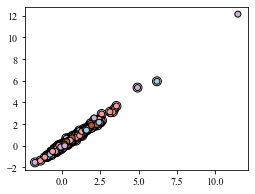

In [28]:
# figure number
fignum = 1

# fit the model
for kernel in ("linear", "poly", "rbf"):
    clf = SVC(kernel=kernel, gamma=2)
    clf.fit(X_tr2, y_tr2)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    plt.scatter(X_tr2[:, 0], X_tr2[:, 1], c=y_tr2, zorder=10, cmap=plt.cm.Paired, edgecolors="k")

    plt.axis("tight")
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

In [85]:
clf.coef_

array([[-1.93856256e-03, -2.14569361e-03, -2.37559346e-03, ...,
         7.34478855e-05,  5.73303094e-05,  8.12920523e-05],
       [-1.60067976e-03, -2.08665905e-03, -1.89359153e-03, ...,
        -4.84472515e-04, -3.81047481e-04, -6.21528468e-04],
       [-8.00932610e-04, -7.61475431e-04, -5.95201782e-04, ...,
         5.39759764e-05,  3.24958116e-05, -5.81454637e-06],
       [ 8.46196958e-04,  8.26981791e-04,  1.00508250e-03, ...,
        -1.05892292e-04, -1.75430712e-04, -1.50300625e-04],
       [ 2.00707349e-03,  2.00652535e-03,  2.38057651e-03, ...,
        -1.71972889e-04, -2.64102145e-04,  6.79849209e-06],
       [-5.47219831e-04, -6.11934315e-04, -6.04085990e-04, ...,
         3.81647394e-04,  4.27278313e-04,  3.18821728e-04]])

<font color=Maroon size=4>**Como utilizamos un patrón randómico para la separación de las muestras en los dos grupo, podría pasar que eésta no se la mejor separación. Por ello, vamos a realizar varios modelos cambiando el patrón randómico a paratir de variación en el argumento *random-state*.  De esta manera encontramos una mejor separación.  Antes de esto creamos una función que realice modelo y calcule las predicciones y la exactitud**

In [29]:
def opt_svc(X, y, xt, rs):
    
    # Definimos PLS y el número de componentes
    svc = SVC(C = 40, kernel = 'rbf', random_state=123)
    svc.fit(X, y)
    y_pred = svc.predict(x_test)
    # Calculamos métricas
    ex = accuracy_score(y_true = y_test, y_pred = y_pred, normalize = True)
        
    return (y_pred, ex)

In [30]:
# Probamos con 30 componentes
exs = []
yps = []
rss = []
arr_rs = np.arange(1, 201)

for rs in arr_rs:
    x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = rs, shuffle = True)
    y_pred, ex = opt_svc(x_train, y_train, x_test, rs)
    rss.append(rs)
    yps.append(y_pred)
    exs.append(ex)

In [39]:
np.max(exs), rss[np.argmax(exs)]

(1.0, 129)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = rss[np.argmax(exs)], shuffle = True)
# Creación del modelo SVM 
svc1 = SVC(C = 40, kernel = 'rbf', random_state=123)
svc1.fit(x_train, y_train)
y_pred_svc = svc1.predict(x_test)
ex_svc = accuracy_score(y_true = y_test, y_pred = y_pred_svc, normalize = True)
ex_svc

1.0

<font color=DarkSlateBlue size=5>**Observamos una leve variación en la exactitud cuando corremos cien modelos variando el patrón randómico de separación, el valor *rs* que da este valor es de 95.  Sin embargo, con un número mayor de modelos (200), encontramos una exactitud de 100%**

<font color=red size=5>**Ahora utilizamos el mismo patrón randómico de separación para implementar un modelo de clasificación utilizando una red neuronal.**

In [98]:
from sklearn.neural_network import MLPClassifier
x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size=0.8, random_state=rss[np.argmax(exs)], shuffle= True)
ann = MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01, solver = 'lbfgs', max_iter = 5000, random_state = 123)
ann.fit(X=x_train, y=y_train)

MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

<font color=green size=5>**Calculamos la predicción y la exactitud en la predicción utilizando el set de prueba**

In [57]:
y_pred = ann.predict(x_test)
score = ann.score(x_test, y_test)
score

0.9727891156462585

<font color=green size=5>**Visualizamos la matriz de confusión para ver donde acierta y donde falla**

In [58]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
confusion_matrix(y_test, y_pred)

array([[29,  0,  1,  0],
       [ 0, 35,  0,  0],
       [ 1,  0, 31,  0],
       [ 0,  2,  0, 48]], dtype=int64)

<font color=blue size=5>**Finalmente generamos un soporte**

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        30
         1.0       0.95      1.00      0.97        35
         2.0       0.97      0.97      0.97        32
         3.0       1.00      0.96      0.98        50

    accuracy                           0.97       147
   macro avg       0.97      0.97      0.97       147
weighted avg       0.97      0.97      0.97       147



<font color=red size=5>**Ahora vamos a Guardar el modelo entrenado.  Empezaremos por el modelo *SVC* y luego el modelo de redes neuronales**

In [62]:
import sklearn.externals
import joblib

File_svc = "Mod_Clas_Lesh_svc.pkl"
joblib.dump(svc1, File_svc)

['Mod_Clas_Lesh_svc.pkl']

In [61]:
File_ann = "Mod_Clas_Lesh_ann.pkl"
joblib.dump(ann, File_ann)

['Mod_Clas_Lesh_ann.pkl']

<font color=red size=5>**Si deseamos cargar el modelo, ejecutamos las siguientes líneas**

In [64]:
Model_svc =joblib.load('Mod_Clas_Lesh_svc.pkl')

In [67]:
#Pred=Model_svc.(x_test)
sc=Model_svc.score(x_test, y_test)
sc

1.0

<font color=MediumOrchid size=5>**Vamos a probar con otros métodos de Clasificación, empecemos con *Random Forest* que ha tenido mucha acogida en los últimos años.  Adicionalmente, para este clasificador podemos obtener las variables más importantes**

Score: 0.84


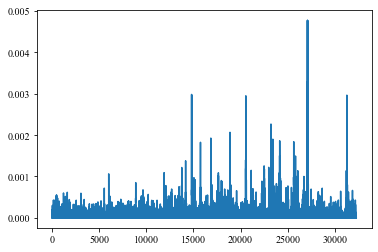

In [146]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
# Variables importantes en el modelo
v_imp = rfc.feature_importances_
plt.plot(v_imp)
print('Score: %.2f' % rfc.score(x_test, y_test))

<font color=DarkBlue size=5>**El Clasificador *XG Boost* y sus variables importantes**

Score: 0.84


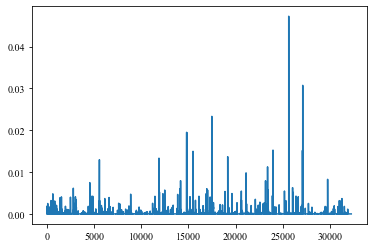

In [148]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
# variables más importantes del modelo
v_imp = xgb.feature_importances_
plt.plot(v_imp)
print('Score: %.2f' % rfc.score(x_test, y_test))

<font color=DarkMagenta size=5>**Algunos modelos de clasificación como el *KNN, SVC, ANN* no es posible utilizar la función *feature_importances_* de *sk-learn*, pero se puede encontra esas variables de mayor importancia para el modelo, utilizando la función *permutation_importance* y luego *importances_mean*, como se muestra aquí:**

Score: 0.84


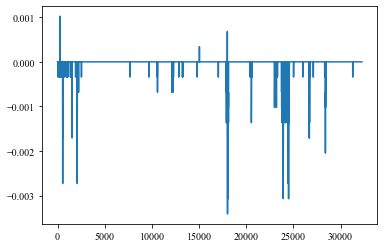

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
# Variables de más importancia
res = permutation_importance(knc, x_train, y_train, scoring='accuracy')
v_imp = res.importances_mean
plt.plot(v_imp)
print('Score: %.2f' % rfc.score(x_test, y_test))

Score: 0.84


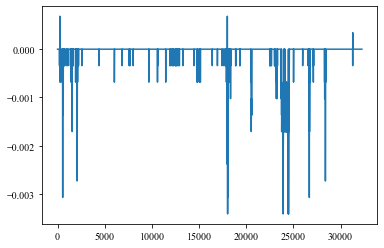

In [151]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
res = permutation_importance(knc, x_train, y_train, scoring='accuracy')
v_impLR = res.importances_mean
plt.plot(v_impLR)
print('Score: %.2f' % rfc.score(x_test, y_test))

In [160]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=586), max_features=5000)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 

X_train_fs, X_test_fs, fs = select_features(x_train, y_train, x_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 99.32


In [161]:
X_train_fs.shape

(586, 5000)

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# define the model
knc = KNeighborsClassifier()
# fit the model
knc.fit(X_train_fs, y_train)
knc.score(X_test_fs, y_test)

0.8095238095238095

In [163]:
from sklearn.neural_network import MLPClassifier
#x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size=0.8, random_state=rss[np.argmax(exs)], shuffle= True)
ann = MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01, solver = 'lbfgs', max_iter = 5000, random_state = 123)
ann.fit(X_train_fs, y_train)
ann.score(X_test_fs, y_test)

0.9387755102040817

In [164]:
svc1 = SVC(C = 40, kernel = 'rbf', random_state=123)
svc1.fit(X_train_fs, y_train)
svc1.score(X_test_fs, y_test)

0.9931972789115646

In [165]:
results = permutation_importance(ann, X_train_fs, y_train, scoring='accuracy')

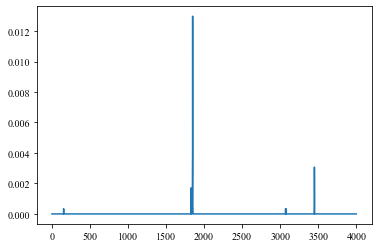

In [136]:
plt.plot(results.importances_mean);

In [31]:
%pwd

'C:\\Users\\Enrique Mejia\\Documents\\Sebastian_Cintrop'